In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import readsav
from astropy.io import fits
from helita.io import lp
import numpy as np
import pickle
from matplotlib import colors
%matplotlib inline

In [2]:
#dpath_clusters= '/mn/stornext/d9/souvikb/K_means_results/'
dpath_sst= '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/'
dpath_kmean ='/mn/stornext/d9/souvikb/K_means_results/'
dpath_cluster_fits= '/mn/stornext/d9/souvikb/K_means_results/'

In [3]:
factor_Isp_counts_chromis = 9.5182255e+10 #Factor to convert specific intensity to counts. Multiply by this factor

In [4]:
cluster_mask = fits.getdata(dpath_cluster_fits+'clusters_mask.fits',ext=0)# Reading the Cluster mask time series
RP = pickle.load(open(dpath_kmean+'kmeans_training.pickle','rb')) #(50,72)

#-----Reading the SST CHROMIS data-------#
hdrCa_im = lp.getheader(dpath_sst+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
hdrCa_sp = lp.getheader(dpath_sst+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris_sp.fcube')
dimCa_im = hdrCa_im[0]#Image dimensions.
dimCa_sp = hdrCa_sp[0]#La Palma SP cube dimensions.
cubeCa = lp.getdata(dpath_sst+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
cubeCa = np.reshape(cubeCa,[dimCa_im[0],dimCa_im[1],dimCa_sp[1],dimCa_sp[0]])

#----Normalization part-----------
# scan = ((154,155,164,165,167,168,194,195,196,197))
# m1a = np.mean(cubeCa[400:699,600:899,scan,41])
# cubeCa_norm = cubeCa[:,:,scan,:]/m1a
# meanCa = np.mean(cubeCa_norm[:,:,:,[0,40]],axis=3)
# m1b = np.median(cubeCa_norm[:,:,:,[0,40]])
# cubeCa_norm = cubeCa_norm[:,:,:,:40]/meanCa[:,:,:,None]*m1b

In [5]:
cubeCa_norm=cubeCa*0.

In [25]:
for scan in range(425):
    m1a = np.mean(cubeCa[400:699,600:899,scan,41])
    cubeCa_1 = cubeCa[:,:,scan,:]/m1a
    meanCa = np.mean(cubeCa_1[:,:,[0,40]],axis=2)
    m1b = np.median(cubeCa_1[:,:,[0,40]])
    cubeCa_norm[:,:,scan,:40] = cubeCa_1[:,:,:40]/meanCa[:,:,None]*m1b

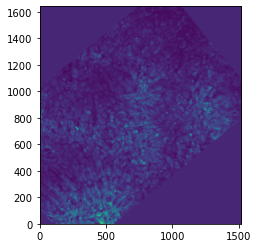

In [18]:
plt.imshow(cubeCa_norm[:,:,2,20].T,origin='lower')

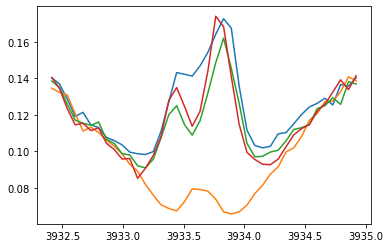

In [26]:
plt.plot(wave_Ca[:40],cubeCa_norm[800,800,0,:40])
plt.plot(wave_Ca[:40],cubeCa_norm[80,800,1,:40])
plt.plot(wave_Ca[:40],cubeCa_norm[800,800,2,:40])
plt.plot(wave_Ca[:40],cubeCa_norm[800,800,3,:40])

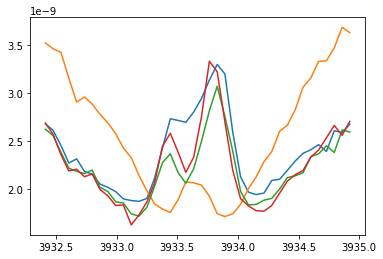

In [27]:
plt.plot(wave_Ca[:40],cubeCa[800,800,0,:40])
plt.plot(wave_Ca[:40],cubeCa[80,800,1,:40])
plt.plot(wave_Ca[:40],cubeCa[800,800,2,:40])
plt.plot(wave_Ca[:40],cubeCa[800,800,3,:40])

In [11]:
meanCa.shape

(1518, 1641)

In [19]:
wave_Ca =readsav(dpath_sst+'spectfile.3950.idlsave')
wave_H= readsav(dpath_sst+'spectfile.6563.idlsave')
wave_Ca=wave_Ca['spect_pos']
wave_H=wave_H['spect_pos']

In [28]:
cube_Ca_test=np.swapaxes(cubeCa_norm,0,1)

In [44]:
dpath_kmean_bose = '/mn/stornext/d9/souvikb/K_means_results/'
data = pickle.load(open(dpath_kmean_bose+'kmeans_training.pickle','rb')) #(50,72)

In [29]:
cluster_interest_blue =[12,48,49,25,11,5]
list_12,list_48,list_49,list_25,list_11,list_5=([] for i in range(6))

for time in range(425):
    res12 = np.asarray(cluster_mask[:,:,time] == cluster_interest_blue[0]).nonzero()
    test12 = cube_Ca_test[res12[0],res12[1],time,:40]
    list_12.append(test12)
    
    res48 = np.asarray(cluster_mask[:,:,time] == cluster_interest_blue[1]).nonzero()
    test48 = cube_Ca_test[res48[0],res48[1],time,:40]
    list_48.append(test48)
    
    res49 = np.asarray(cluster_mask[:,:,time] == cluster_interest_blue[2]).nonzero()
    test49 = cube_Ca_test[res49[0],res49[1],time,:40]
    list_49.append(test49)
    
    res25 = np.asarray(cluster_mask[:,:,time] == cluster_interest_blue[3]).nonzero()
    test25 = cube_Ca_test[res25[0],res25[1],time,:40]
    list_25.append(test25)
    
    res11 = np.asarray(cluster_mask[:,:,time] == cluster_interest_blue[4]).nonzero()
    test11 = cube_Ca_test[res11[0],res11[1],time,:40]
    list_11.append(test11)
    
    res5 = np.asarray(cluster_mask[:,:,time] == cluster_interest_blue[5]).nonzero()
    test5 = cube_Ca_test[res5[0],res5[1],time,:40]
    list_5.append(test5)

In [79]:
test12.shape

(11420, 40)

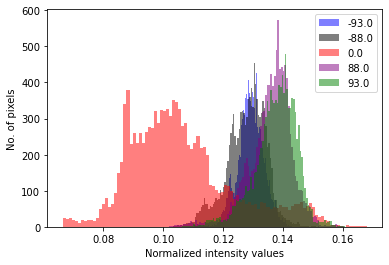

In [107]:
plt.hist(test12[:,1],alpha=0.5,bins=100,color='Blue',label=np.round(dopp_Ca[1]))
plt.hist(test12[:,2],alpha=0.5,bins=100,color='Black',label=np.round(dopp_Ca[2]))
plt.hist(test12[:,20],alpha=0.5,bins=100,color='Red',label=dopp_Ca[20])
#plt.hist(test12[:,21],alpha=0.5,bins=100,color='Green',label=dopp_Ca[21])
plt.hist(test12[:,38],alpha=0.5,bins=100,color='Purple',label=np.round(dopp_Ca[38]))
plt.hist(test12[:,39],alpha=0.5,bins=100,color='Green',label=np.round(dopp_Ca[39]))
plt.legend(loc='best')
plt.xlabel('Normalized intensity values')
plt.ylabel('No. of pixels')
plt.savefig('/mn/stornext/u3/souvikb/paper4_images/histograms_per_wavelength.png',dpi=600)

In [35]:
dopp_Ca = ((wave_Ca[:41]-3933.7)/3933.7)*3e5
all_profiles_48 = np.concatenate((list_48[:]),axis=0)
size_48 = all_profiles_48.shape
repeat_wave_48=np.tile(dopp_Ca[:40],size_48[0])

all_profiles_12 = np.concatenate((list_12[:]),axis=0)
size_12 = all_profiles_12.shape
repeat_wave_12=np.tile(dopp_Ca[:40],size_12[0])

all_profiles_49 = np.concatenate((list_49[:]),axis=0)
size_49 = all_profiles_49.shape
repeat_wave_49 =np.tile(dopp_Ca[:40],size_49[0])

all_profiles_25 = np.concatenate((list_25[:]),axis=0)
size_25 = all_profiles_25.shape
repeat_wave_25 =np.tile(dopp_Ca[:40],size_25[0])

all_profiles_11 = np.concatenate((list_11[:]),axis=0)
size_11 = all_profiles_11.shape
repeat_wave_11=np.tile(dopp_Ca[:40],size_11[0])

all_profiles_5 = np.concatenate((list_5[:]),axis=0)
size_5 = all_profiles_5.shape
repeat_wave_5=np.tile(dopp_Ca[:40],size_5[0])

In [34]:
dopp_Ca.shape

(41,)

In [ ]:
plt.plot(rand_1[0,:])
plt.plot(rand_1[1,:])
plt.plot(rand_1[3,:])

In [ ]:
heatmap1, xedges1, yedges1 = np.histogram2d(rand_1.flatten(), rand_2.flatten(), bins=100)
extent1 = [xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]]
plt.imshow(heatmap1, origin='lower' ,extent=extent1,aspect='auto',cmap='plasma')
plt.colorbar()

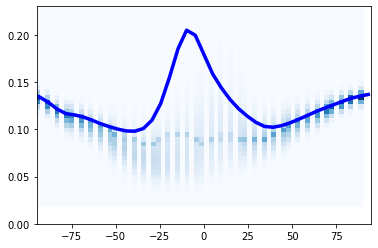

In [105]:
heatmap, xedges, yedges = np.histogram2d(repeat_wave_48,all_profiles_48.flatten(), bins=(70,100))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
X, Y = np.meshgrid(xedges[0:-1],yedges[0:-1])
# f = interp2d(X, Y, heatmap.T, kind='cubic')
# xnew = np.arange(-100,100,1)
# ynew = np.arange(0.5e-9,6e-9,0.1e-10)
# data1 = f(xnew,ynew)
# Xn, Yn = np.meshgrid(xnew, ynew)
plt.pcolormesh(X, Y, heatmap.T,cmap='Blues',shading='gauroud',alpha=1)
plt.ylim((0,0.23))
plt.xlim((-95,95))
#plt.plot(dopp_Ca[:40],np.mean(all_profiles_48,axis=0),color='Blue',linewidth=3.5
plt.plot(dopp_Ca[:40],data[26,:40],color='Blue',linewidth=3.5)

In [50]:
cluster_interest_red =[18,46,26,36,8,16]
list_18,list_46,list_26,list_36,list_8,list_16=([] for i in range(6))

for time in range(425):
    res18 = np.asarray(cluster_mask[:,:,time] == cluster_interest_red[0]).nonzero()
    test18 = cube_Ca_test[res18[0],res18[1],time,:40]
    list_18.append(test18)
    
    res46 = np.asarray(cluster_mask[:,:,time] == cluster_interest_red[1]).nonzero()
    test46 = cube_Ca_test[res46[0],res46[1],time,:40]
    list_46.append(test46)
    
    res26 = np.asarray(cluster_mask[:,:,time] == cluster_interest_red[2]).nonzero()
    test26 = cube_Ca_test[res26[0],res26[1],time,:40]
    list_26.append(test26)
    
    res36 = np.asarray(cluster_mask[:,:,time] == cluster_interest_red[3]).nonzero()
    test36 = cube_Ca_test[res36[0],res36[1],time,:40]
    list_36.append(test36)
    
    res8 = np.asarray(cluster_mask[:,:,time] == cluster_interest_red[4]).nonzero()
    test8 = cube_Ca_test[res8[0],res8[1],time,:40]
    list_8.append(test8)
    
    res16 = np.asarray(cluster_mask[:,:,time] == cluster_interest_red[5]).nonzero()
    test16 = cube_Ca_test[res16[0],res16[1],time,:40]
    list_16.append(test16)

In [51]:
dopp_Ca = ((wave_Ca[:40]-3933.7)/3933.7)*3e5
all_profiles_18 = np.concatenate((list_18[:]),axis=0)
size_18 = all_profiles_18.shape
repeat_wave_18=np.tile(dopp_Ca,size_18[0])

all_profiles_46 = np.concatenate((list_46[:]),axis=0)
size_46 = all_profiles_46.shape
repeat_wave_46=np.tile(dopp_Ca,size_46[0])

all_profiles_26 = np.concatenate((list_26[:]),axis=0)
size_26 = all_profiles_26.shape
repeat_wave_26 =np.tile(dopp_Ca,size_26[0])

all_profiles_36 = np.concatenate((list_36[:]),axis=0)
size_36 = all_profiles_36.shape
repeat_wave_36 =np.tile(dopp_Ca,size_36[0])

all_profiles_8 = np.concatenate((list_8[:]),axis=0)
size_8 = all_profiles_8.shape
repeat_wave_8=np.tile(dopp_Ca,size_8[0])

all_profiles_16 = np.concatenate((list_16[:]),axis=0)
size_16 = all_profiles_16.shape
repeat_wave_16=np.tile(dopp_Ca,size_16[0])

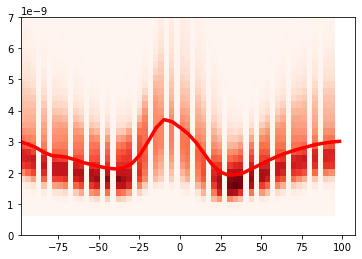

In [21]:
heatmap, xedges, yedges = np.histogram2d(repeat_wave_18,all_profiles_18.flatten(), bins=(60,90))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
X, Y = np.meshgrid(xedges[0:-1],yedges[0:-1])
# f = interp2d(X, Y, heatmap.T, kind='cubic')
# xnew = np.arange(-100,100,1)
# ynew = np.arange(0.5e-9,6e-9,0.1e-10)
# data1 = f(xnew,ynew)
# Xn, Yn = np.meshgrid(xnew, ynew)
plt.pcolormesh(X, Y, heatmap.T,cmap='Reds',shading='gauroud')
plt.ylim((0,0.7e-8))
plt.plot(dopp_Ca[:41],np.median(all_profiles_18,axis=0),color='Red',linewidth=3.5)

# RBE density plots

In [52]:
heatmap1, xedges1, yedges1 = np.histogram2d(repeat_wave_48,all_profiles_48.flatten(), bins=(60,90))
extent1 = [xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]]
X1, Y1 = np.meshgrid(xedges1[0:-1],yedges1[0:-1])

In [53]:
heatmap2, xedges2, yedges2 = np.histogram2d(repeat_wave_12,all_profiles_12.flatten(), bins=(60,90))
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]
X2, Y2 = np.meshgrid(xedges2[0:-1],yedges2[0:-1])

In [54]:
heatmap3, xedges3, yedges3 = np.histogram2d(repeat_wave_49,all_profiles_49.flatten(), bins=(60,90))
extent3 = [xedges3[0], xedges3[-1], yedges3[0], yedges3[-1]]
X3, Y3 = np.meshgrid(xedges3[0:-1],yedges3[0:-1])

In [55]:
heatmap4, xedges4, yedges4 = np.histogram2d(repeat_wave_25,all_profiles_25.flatten(), bins=(60,90))
extent4 = [xedges4[0], xedges4[-1], yedges4[0], yedges4[-1]]
X4, Y4 = np.meshgrid(xedges4[0:-1],yedges4[0:-1])

In [56]:
heatmap5, xedges5, yedges5 = np.histogram2d(repeat_wave_11,all_profiles_11.flatten(), bins=(60,90))
extent5 = [xedges5[0], xedges5[-1], yedges5[0], yedges5[-1]]
X5, Y5 = np.meshgrid(xedges5[0:-1],yedges5[0:-1])

In [57]:
heatmap6, xedges6, yedges6 = np.histogram2d(repeat_wave_5,all_profiles_5.flatten(), bins=(60,90))
extent6 = [xedges6[0], xedges6[-1], yedges6[0], yedges6[-1]]
X6, Y6 = np.meshgrid(xedges6[0:-1],yedges6[0:-1])

# RRE profile density plots

In [58]:
heatmap7, xedges7, yedges7 = np.histogram2d(repeat_wave_18,all_profiles_18.flatten(), bins=(60,90))
extent7 = [xedges7[0], xedges7[-1], yedges7[0], yedges7[-1]]
X7, Y7 = np.meshgrid(xedges7[0:-1],yedges7[0:-1])

In [59]:
heatmap8, xedges8, yedges8 = np.histogram2d(repeat_wave_46,all_profiles_46.flatten(), bins=(60,90))
extent8 = [xedges8[0], xedges8[-1], yedges8[0], yedges8[-1]]
X8, Y8 = np.meshgrid(xedges8[0:-1],yedges8[0:-1])

In [60]:
heatmap9, xedges9, yedges9 = np.histogram2d(repeat_wave_26,all_profiles_26.flatten(), bins=(60,90))
extent9 = [xedges9[0], xedges9[-1], yedges9[0], yedges9[-1]]
X9, Y9 = np.meshgrid(xedges9[0:-1],yedges9[0:-1])

In [61]:
heatmap10, xedges10, yedges10 = np.histogram2d(repeat_wave_36,all_profiles_36.flatten(), bins=(60,90))
extent10 = [xedges10[0], xedges10[-1], yedges10[0], yedges10[-1]]
X10, Y10 = np.meshgrid(xedges10[0:-1],yedges10[0:-1])

In [62]:
heatmap11, xedges11, yedges11 = np.histogram2d(repeat_wave_8,all_profiles_8.flatten(), bins=(60,90))
extent11 = [xedges11[0], xedges11[-1], yedges11[0], yedges11[-1]]
X11, Y11 = np.meshgrid(xedges11[0:-1],yedges11[0:-1])

In [63]:
heatmap12, xedges12, yedges12 = np.histogram2d(repeat_wave_16,all_profiles_16.flatten(), bins=(60,90))
extent12= [xedges12[0], xedges12[-1], yedges12[0], yedges12[-1]]
X12, Y12 = np.meshgrid(xedges12[0:-1],yedges12[0:-1])

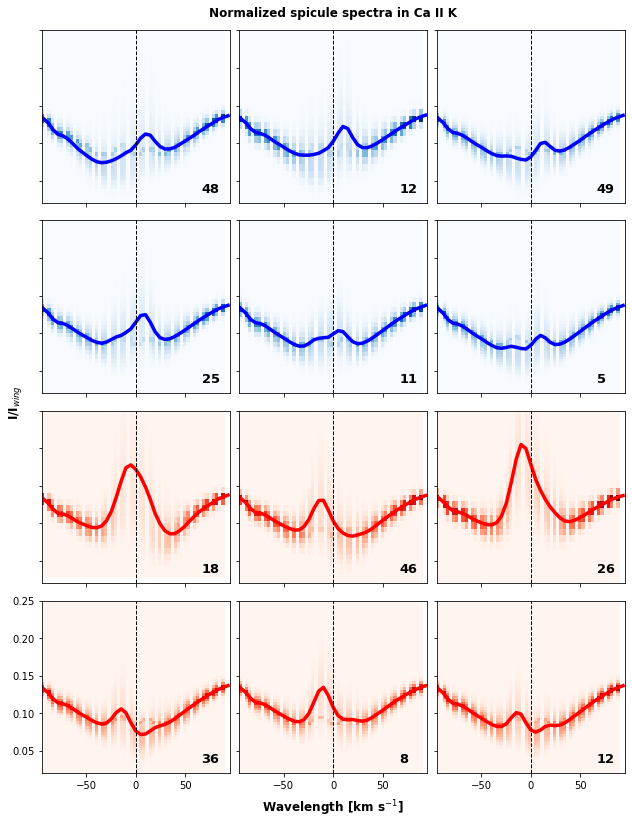

In [78]:
fig, ax = plt.subplots(4,3,figsize=(9,12),sharey='row')
fig.subplots_adjust(hspace = 0.1,wspace=0.05,left=0.05,right=0.95,top=0.93,bottom=0.07)
ax=ax.ravel()

ax[0].pcolormesh(X1, Y1, heatmap1.T,cmap='Blues',shading='gauroud')
ax[0].set_ylim((0.02,0.25))
ax[0].set_xlim((-95,95))
ax[0].plot(dopp_Ca[:40],data[48,:40],color='Blue',linewidth=3.5)
ax[0].text(.85, .065, str(48), transform=ax[0].transAxes, size=13,color='Black',fontweight='bold')
ax[0].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.setp(ax[0].get_yticklabels(), visible=False)

ax[1].pcolormesh(X2, Y2, heatmap2.T,cmap='Blues',shading='gauroud')
ax[1].set_ylim((0.02,0.25))
ax[1].set_xlim((-95,95))
ax[1].plot(dopp_Ca[:40],data[12,:40],color='Blue',linewidth=3.5)
ax[1].text(.85, .065, str(12), transform=ax[1].transAxes, size=13,color='Black',fontweight='bold')
ax[1].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[1].get_xticklabels(), visible=False)
plt.setp(ax[1].get_yticklabels(), visible=False)

ax[2].pcolormesh(X3, Y3, heatmap3.T,cmap='Blues',shading='gauroud')
ax[2].set_ylim((0.02,0.25))
ax[2].set_xlim((-95,95))
ax[2].plot(dopp_Ca[:40],data[49,:40],color='Blue',linewidth=3.5)
ax[2].text(.85, .065, str(49), transform=ax[2].transAxes, size=13,color='Black',fontweight='bold')
ax[2].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[2].get_xticklabels(), visible=False)
plt.setp(ax[2].get_yticklabels(), visible=False)

ax[3].pcolormesh(X4, Y4, heatmap4.T,cmap='Blues',shading='gauroud')
ax[3].set_ylim((0.02,0.25))
ax[3].set_xlim((-95,95))
ax[3].plot(dopp_Ca[:40],data[25,:40],color='Blue',linewidth=3.5)
ax[3].text(.85, .065, str(25), transform=ax[3].transAxes, size=13,color='Black',fontweight='bold')
ax[3].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[3].get_xticklabels(), visible=False)
plt.setp(ax[3].get_yticklabels(), visible=False)

ax[4].pcolormesh(X5, Y5, heatmap5.T,cmap='Blues',shading='gauroud')
ax[4].set_ylim((0.02,0.25))
ax[4].set_xlim((-95,95))
ax[4].plot(dopp_Ca[:40],data[11,:40],color='Blue',linewidth=3.5)
ax[4].text(.85, .065, str(11), transform=ax[4].transAxes, size=13,color='Black',fontweight='bold')
ax[4].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[4].get_xticklabels(), visible=False)
plt.setp(ax[4].get_yticklabels(), visible=False)

ax[5].pcolormesh(X6, Y6, heatmap6.T,cmap='Blues',shading='gauroud')
ax[5].set_ylim((0.02,0.25))
ax[5].set_xlim((-95,95))
ax[5].plot(dopp_Ca[:40],data[5,:40],color='Blue',linewidth=3.5)
ax[5].text(.85, .065, str(5), transform=ax[5].transAxes, size=13,color='Black',fontweight='bold')
ax[5].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[5].get_xticklabels(), visible=False)
plt.setp(ax[5].get_yticklabels(), visible=False)

ax[6].pcolormesh(X7, Y7, heatmap7.T,cmap='Reds',shading='gauroud')
ax[6].set_ylim((0.02,0.25))
ax[6].set_xlim((-95,95))
ax[6].plot(dopp_Ca[:40],data[18,:40],color='Red',linewidth=3.5)
ax[6].text(.85, .065, str(18), transform=ax[6].transAxes, size=13,color='Black',fontweight='bold')
ax[6].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[6].get_xticklabels(), visible=False)
plt.setp(ax[6].get_yticklabels(), visible=False)

ax[7].pcolormesh(X8, Y8, heatmap8.T,cmap='Reds',shading='gauroud')
ax[7].set_ylim((0.02,0.25))
ax[7].set_xlim((-95,95))
ax[7].plot(dopp_Ca[:40],data[46,:40],color='Red',linewidth=3.5)
ax[7].text(.85, .065, str(46), transform=ax[7].transAxes, size=13,color='Black',fontweight='bold')
ax[7].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[7].get_xticklabels(), visible=False)
plt.setp(ax[7].get_yticklabels(), visible=False)

ax[8].pcolormesh(X9, Y9, heatmap9.T,cmap='Reds',shading='gauroud')
ax[8].set_ylim((0.02,0.25))
ax[8].set_xlim((-95,95))
ax[8].plot(dopp_Ca[:40],data[26,:40],color='Red',linewidth=3.5)
ax[8].text(.85, .065, str(26), transform=ax[8].transAxes, size=13,color='Black',fontweight='bold')
ax[8].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
plt.setp(ax[8].get_xticklabels(), visible=False)
plt.setp(ax[8].get_yticklabels(), visible=False)

ax[9].pcolormesh(X10, Y10, heatmap10.T,cmap='Reds',shading='gauroud')
ax[9].set_ylim((0.02,0.25))
ax[9].set_xlim((-95,95))
ax[9].plot(dopp_Ca[:40],data[36,:40],color='Red',linewidth=3.5)
ax[9].text(.85, .065, str(36), transform=ax[9].transAxes, size=13,color='Black',fontweight='bold')
ax[9].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
# plt.setp(axs[9].get_xticklabels(), visible=False)
# plt.setp(axs[9].get_yticklabels(), visible=False)

ax[10].pcolormesh(X11, Y11, heatmap11.T,cmap='Reds',shading='gauroud')
ax[10].set_ylim((0.02,0.25))
ax[10].set_xlim((-95,95))
ax[10].plot(dopp_Ca[:40],data[8,:40],color='Red',linewidth=3.5)
ax[10].text(.85, .065, str(8), transform=ax[10].transAxes, size=13,color='Black',fontweight='bold')
ax[10].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
# plt.setp(axs[10].get_xticklabels(), visible=False)
# plt.setp(axs[10].get_yticklabels(), visible=False)

ax[11].pcolormesh(X12, Y12, heatmap12.T,cmap='Reds',shading='gauroud')
ax[11].set_ylim((0.02,0.25))
ax[11].set_xlim((-95,95))
ax[11].plot(dopp_Ca[:40],data[16,:40],color='Red',linewidth=3.5)
ax[11].text(.85, .065, str(12), transform=ax[11].transAxes, size=13,color='Black',fontweight='bold')
ax[11].axvline(x=0,color='black',linewidth = 1,linestyle='dashed')
# plt.setp(axs[2].get_xticklabels(), visible=False)
# plt.setp(axs[].get_yticklabels(), visible=False)
fig.text(0.5, 0.95, 'Normalized spicule spectra in Ca II K', ha='center', va='center', rotation='horizontal',size=12,fontweight='bold')
fig.text(0.5, 0.03, 'Wavelength [km s$^{-1}$]', ha='center', va='center', rotation='horizontal',size=12,fontweight='bold')
fig.text(0.01, 0.5, r'I/I$_{wing}$', ha='center', va='center', rotation='vertical',size=12,fontweight='bold')
# fig.text(0.01, 0.5, r'I$_{sp}$ [W m$^{-2}$ s$^{-1}$ sr$^{-1}$]', ha='center', va='center', rotation='vertical',size=12,fontweight='bold')
plt.savefig('/mn/stornext/u3/souvikb/paper4_images/1D_density_plot_normalized.pdf')